<a href="https://colab.research.google.com/github/AltagiAbdallah/Smoke-Detection-Analysis/blob/main/Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1: Import Libraries**

>>  To Imports libraries and mounts Google Drive for data access.

In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np  # For numerical operations
import pandas as pd  # For data analysis
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations
from sklearn.model_selection import train_test_split, StratifiedKFold  # For splitting data and cross-validation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree model
from sklearn.svm import SVC  # For Support Vector Machine model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score, roc_auc_score  # For evaluation metrics

!pip install pandas scikit-learn seaborn matplotlib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Step 2: Load the Dataset**

>> To Loads the smoke_detection_iot.csv dataset.

In [4]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/new /smoke_detection_iot.csv')

### **Step 3: Explore the Data**

>> To Explores data structure, checks for missing values/duplicates, and visualizes correlations.

First 5 rows of the DataFrame:
   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

 

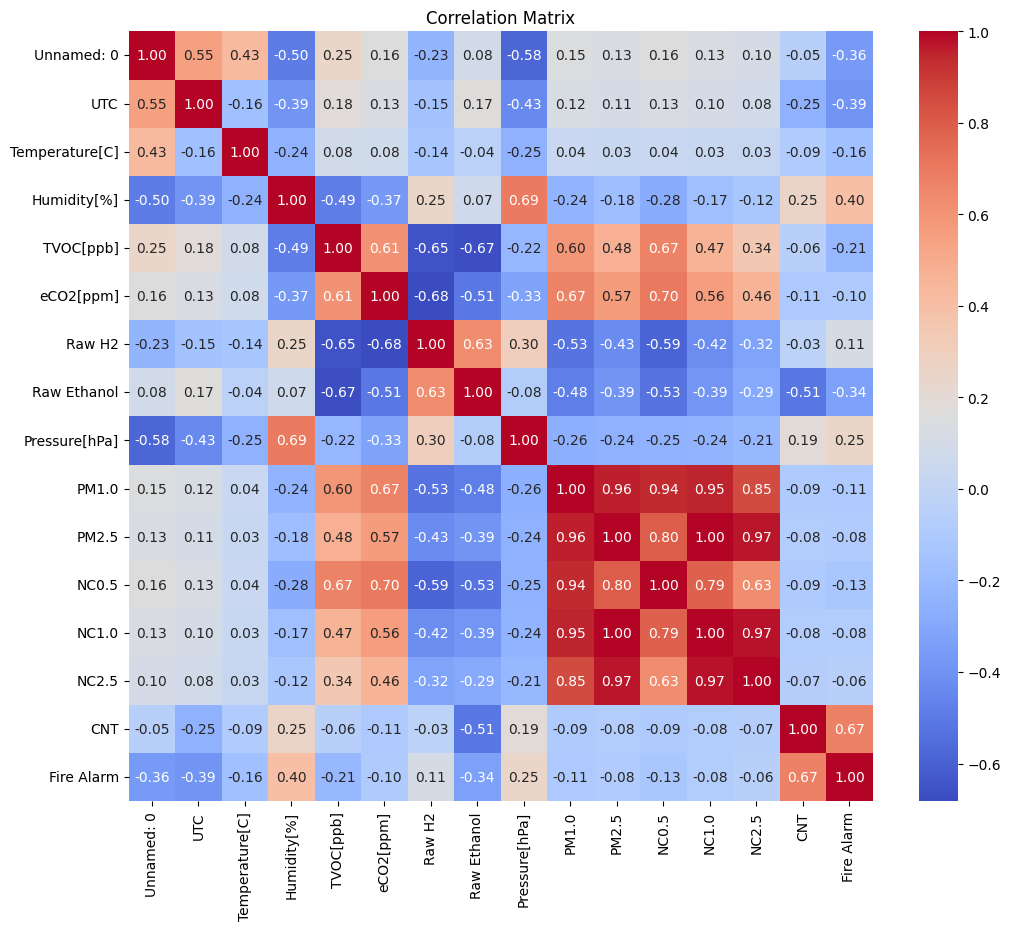

In [5]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Get information about the DataFrame
print("\nDataFrame Information:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

# Calculate and visualize the correlation matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### **Step 4: Dataset Background Analysis**

>> To Analyzes and visualizes the distribution of the 'Fire Alarm' target variable.


--- 4. Dataset Background Analysis ---

4.1. Class Distribution:
Fire Alarm
1    44757
0    17873
Name: count, dtype: int64


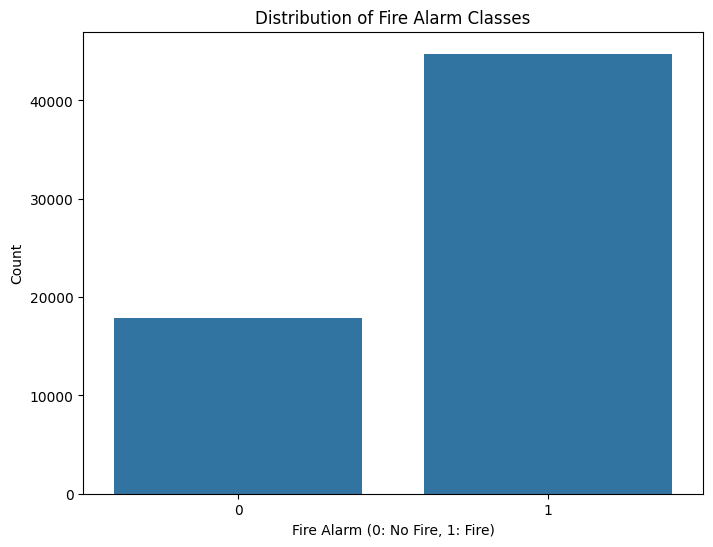

In [7]:
# 4.1. Class Distribution
# Count the occurrences of each class in the 'Fire Alarm' column
print("\n--- 4. Dataset Background Analysis ---")
print("\n4.1. Class Distribution:")
class_distribution = df['Fire Alarm'].value_counts()
print(class_distribution)

# Visualize the class distribution using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Fire Alarm')
plt.title('Distribution of Fire Alarm Classes')
plt.xlabel('Fire Alarm (0: No Fire, 1: Fire)')
plt.ylabel('Count')
plt.show()

### **Step 5: Pre-processing**

>> To Splits data into training/testing sets and scales numerical features.

In [8]:
# 6.1. Split Data into Training and Testing Sets
# Separate features (X) and target (y)
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

print(y.value_counts())

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Step 6: Model Evaluation Preparation ---\n")
print("6.1. Data split into training and testing sets:")
print("  X_train shape:", X_train.shape)
print("  X_test shape:", X_test.shape)
print("  y_train shape:", y_train.shape)
print("  y_test shape:", y_test.shape)

# 5.4. Scaling Numerical Features (moved after splitting)
# Identify numerical features for scaling
numerical_features_selected = ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
                                    'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM2.5', 'NC2.5', 'CNT']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_features_selected] = scaler.fit_transform(X_train[numerical_features_selected])

# Transform the test data using the fitted scaler
X_test[numerical_features_selected] = scaler.transform(X_test[numerical_features_selected])

print("\n5.4. Scaled numerical features (training data head):")
print(X_train[numerical_features_selected].head())
print("\n5.4. Scaled numerical features (test data head):")
print(X_test[numerical_features_selected].head())

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

--- Step 6: Model Evaluation Preparation ---

6.1. Data split into training and testing sets:
  X_train shape: (50104, 15)
  X_test shape: (12526, 15)
  y_train shape: (50104,)
  y_test shape: (12526,)

5.4. Scaled numerical features (training data head):
            UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  \
28479 -0.245671        0.383047     1.262037  -0.212094  -0.140413  0.718116   
42605 -0.116857        0.699854    -0.149420  -0.088255  -0.128899 -0.209092   
17963 -0.369087        0.152300    -0.114359  -0.104056  -0.140413 -0.124466   
56394 -0.677808        3.042138    -4.180214   7.459355   1.903285 -4.311617   
29875 -0.232941        0.440142     0.030405  -0.245366  -0.140413  1.148605   

       Raw Ethanol  Pressure[hPa]     PM2.5     NC2.5       CNT  
28479     0.278251       0.785434 -0.091257 -0.072583 -0.926127  
42605    -0.544668       0.076767 -0.091073 -0.072575  0.932287  
17963

### **Step 6: Model Evaluation Preparation**

>> To Explains the chosen hold-out evaluation technique.

In [ ]:
# 6. Model Evaluation Technique Selection and Explanation

print("\n6. Model Evaluation Technique Selection and Explanation:")
print("  We will use the hold-out evaluation technique to evaluate the models.")
print("  This technique is chosen for its simplicity and speed in providing a single estimate of the model's performance on unseen data.")
print("  The data will be split into a training set to train the models and a separate testing set to evaluate their performance.")



6. Model Evaluation Technique Selection and Explanation:
  We will use the hold-out evaluation technique to evaluate the models.
  This technique is chosen for its simplicity and speed in providing a single estimate of the model's performance on unseen data.
  The data will be split into a training set to train the models and a separate testing set to evaluate their performance.


### **Step 7: Model Training and Evaluation**

>> To Trains and evaluates an SVM model, showing accuracy, classification report, and confusion matrix, and also to Trains and evaluates a Decision Tree model, showing accuracy, classification report, and confusion matrix.


--- Step 7: Model Training and Evaluation (using Hold-out) ---

7.1. Support Vector Machine (SVM)
Accuracy: 0.9480281015487786
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      3594
           1       0.93      1.00      0.96      8932

    accuracy                           0.95     12526
   macro avg       0.97      0.91      0.93     12526
weighted avg       0.95      0.95      0.95     12526

Confusion Matrix:
 [[2949  645]
 [   6 8926]]


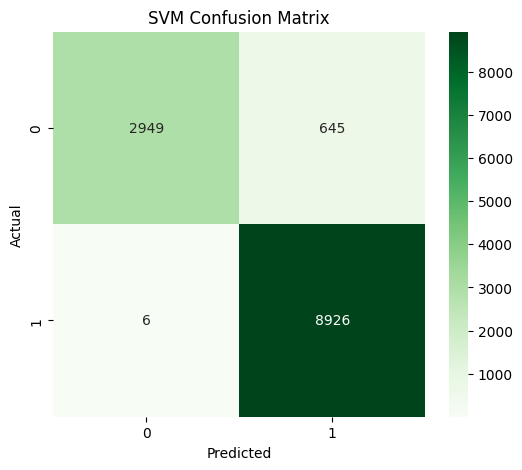


7.2. Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

The prediction accuracy is: 100.00%


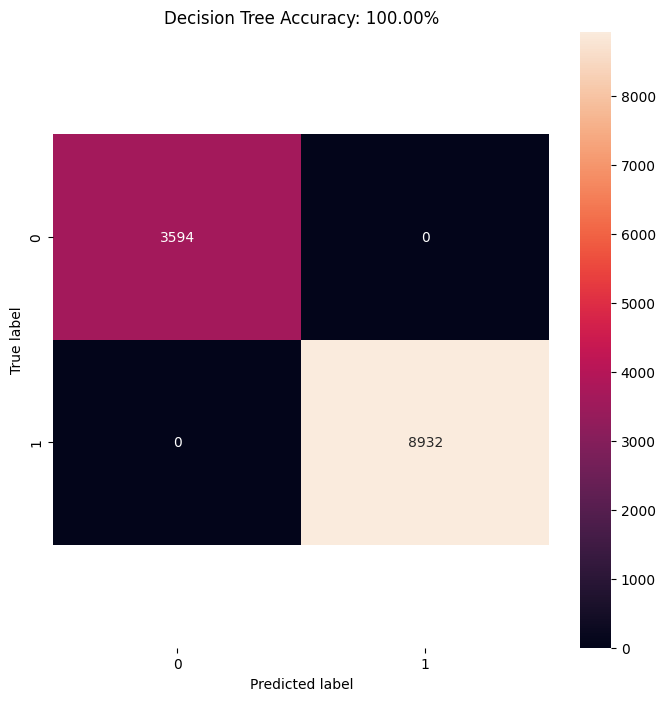

In [ ]:
# --- Step 7: Model Training and Evaluation ---
print("\n--- Step 7: Model Training and Evaluation (using Hold-out) ---")

# 7.1. Support Vector Machine (SVM) - Hold-out Evaluation
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print("\n7.1. Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 7.2. Decision Tree - Hold-out Evaluation
dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt_classifier.fit(X_train, y_train)
predict_dt = dt_classifier.predict(X_test)
print("\n7.2. Decision Tree")
print(classification_report(y_test, predict_dt))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dt_classifier.score(X_test, y_test) * 100, "%"))
cm_dt = confusion_matrix(y_test, predict_dt)
import pandas as pd
cm_df_dt = pd.DataFrame(cm_dt, columns=sorted(y.unique()), index=sorted(y.unique()))
plt.figure(figsize=(8, 8))
ax_dt = sns.heatmap(cm_df_dt, annot=True, fmt='g')
bottom_dt, top_dt = ax_dt.get_ylim()
ax_dt.set_ylim(bottom_dt + 0.5, top_dt - 0.5)
plt.title("Decision Tree Accuracy: {0:2.2f}%".format(dt_classifier.score(X_test, y_test) * 100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
